## Kernel regression

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import kdetools as kt

### Linear regression

Define 'true' function on an interval and add some noise:

In [2]:
np.random.seed(42)
a0, a1 = 8, 2.45
x = np.random.uniform(-200, 200, size=200)
y = a1*x + a0 + np.random.normal(0, 200, size=x.size)

Estimate joint distribution of `x` and `y` and fit KDE:

In [3]:
X = np.stack([x,y]).T
kde = kt.gaussian_kde(X.T)
kde.set_bandwidth(bw_method='cv', bw_type='equal')
kde.factor

array([45.45870683])

Define test values of `x`:

In [4]:
x_test = np.arange(-200,200,1)

Do kernel regression using Nadaraya-Watson:

In [5]:
nw = kde.nw(x_test, [0])

Take multiple samples of `y` conditional on specified values of `x` and take the mean:

In [6]:
y_samp = kde.conditional_resample(1000, x_test[:,None], [0])
y_est = y_samp.mean(axis=1)

Plot:

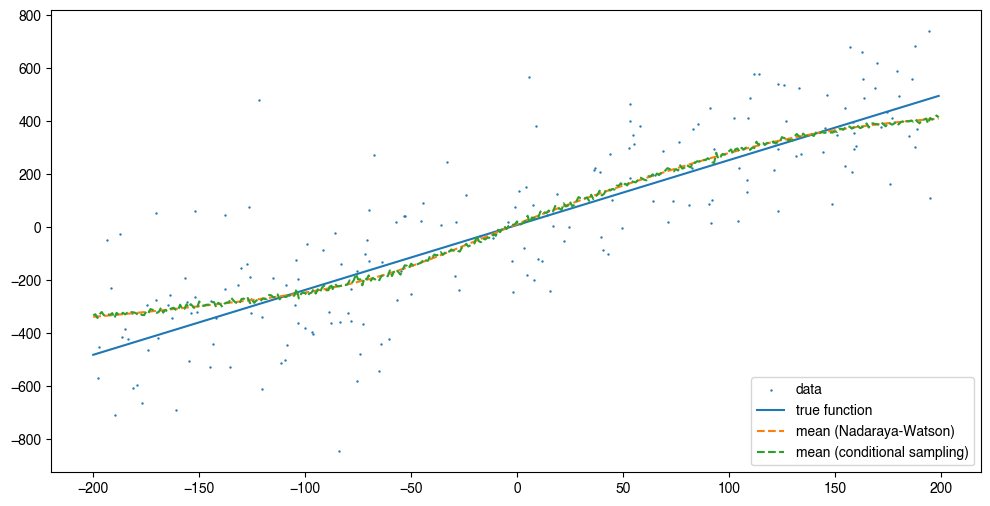

In [7]:
fig, ax = plt.subplots(1,1,figsize=(12,6))
ax.scatter(x, y, s=0.5, label='data');
ax.plot(x_test, a1*x_test + a0, label='true function')
ax.plot(x_test, nw, ls='--', label='mean (Nadaraya-Watson)')
ax.plot(x_test, y_est, ls='--', label='mean (conditional sampling)')
ax.legend();

### Non-linear regression

Define 'true' function on an interval and add some noise:

In [8]:
x = np.linspace(0, 2*np.pi, 100)
y = np.sin(x) + np.random.normal(size=100) * 0.5

Estimate joint distribution of `x` and `y` and fit KDE:

In [9]:
X = np.stack([x, y])
kde = kt.gaussian_kde(X)
kde.set_bandwidth(bw_method='cv', bw_type='covariance')
kde.factor

array([0.37334211])

In [10]:
x_test = np.linspace(0, 2*np.pi, 100)

Do kernel regression using Nadaraya-Watson:

In [11]:
nw = kde.nw(x_test, [0])

Take multiple samples of `y` conditional on specified values of `x` and take the mean:

In [12]:
y_samp = kde.conditional_resample(1000, x_test, [0])
y_est = y_samp.mean(axis=1)

Plot:

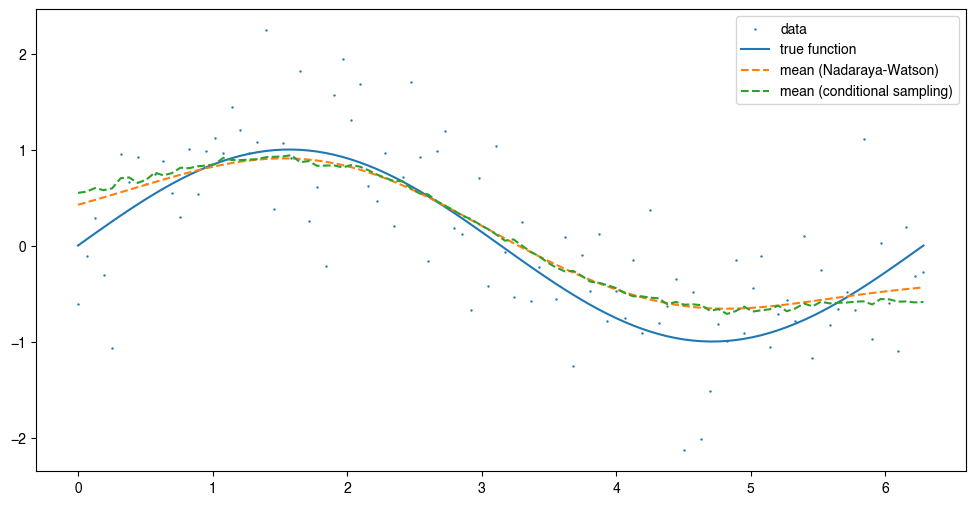

In [13]:
fig, ax = plt.subplots(1,1,figsize=(12,6))
ax.scatter(x, y, s=0.5, label='data');
ax.plot(x_test, np.sin(x_test), label='true function')
ax.plot(x_test, nw, ls='--', label='mean (Nadaraya-Watson)')
ax.plot(x_test, y_est, ls='--', label='mean (conditional sampling)')
ax.legend();

### Smoothing

Load Atlantic Multidecadal Oscillation (AMO) time series from NOAA and take annual averages for simplicity:

In [14]:
url = 'https://www1.ncdc.noaa.gov/pub/data/cmb/ersst/v5/index/ersst.v5.amo.dat'
amo_raw = pd.read_csv(url, skiprows=1, sep='\s+', engine='python')
amo = amo_raw.rename(columns={'Year': 'year', 'SSTA': 'amo'}).set_index(['year','month'])['amo'].groupby(level='year').mean()
amo.tail()

year
2021    0.691667
2022    0.725833
2023    1.116667
2024    1.218333
2025    0.817500
Name: amo, dtype: float64

Estimate joint distribution of `x` and `y` and fit KDE:

In [15]:
X = amo.reset_index().values
kde = kt.gaussian_kde(X.T)
kde.set_bandwidth(bw_method='cv', bw_type='covariance')

Do kernel regression using Nadaraya-Watson:

In [16]:
nw = kde.nw(X[:,0], [0])

Take multiple samples of `y` conditional on specified values of `x` and take the mean:

In [17]:
y_samp = kde.conditional_resample(1000, X[:,0], [0])
y_est = y_samp.mean(axis=1)

Plot:

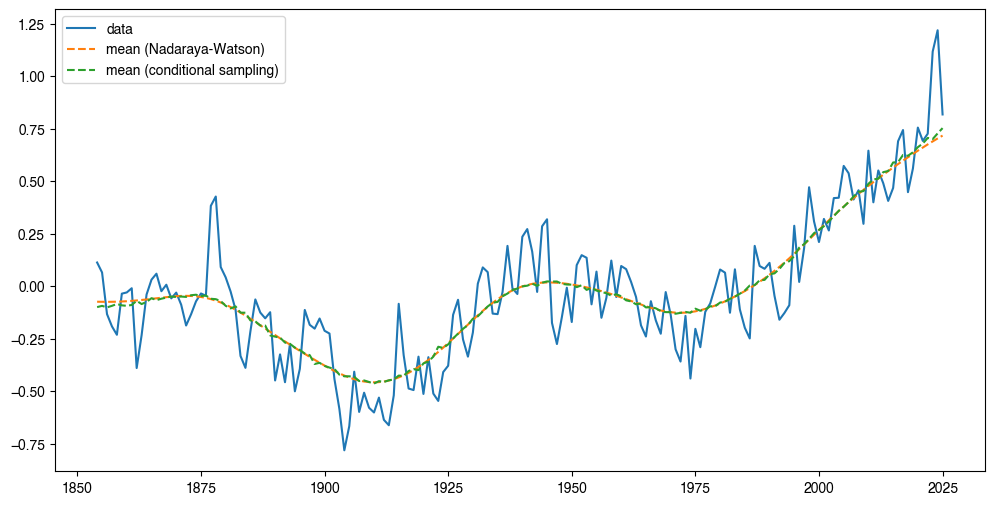

In [18]:
fig, ax = plt.subplots(1,1,figsize=(12,6))
ax.plot(X[:,0], X[:,1], label='data');
ax.plot(X[:,0], nw, ls='--', label='mean (Nadaraya-Watson)')
ax.plot(X[:,0], y_est, ls='--', label='mean (conditional sampling)')
ax.legend();